In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score, KFold

In [19]:
# Función para evaluar modelo de clasificación
def evaluate_classifier(classifier, test_vectors, test_labels):

  # Realizar predicciones
  predictions = classifier.predict(test_vectors)

  # Matriz de Confusión
  matriz = confusion_matrix(test_labels, predictions)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = [False, True])
  cm_display.plot()
  plt.show()

  # Calcular la precisión del modelo
  precision = precision_score(test_labels, predictions, average='macro')
  print('Precisión del modelo:')
  print(precision)

  # Calcular la exactitud del modelo
  accuracy = accuracy_score(test_labels, predictions)
  print('Exactitud del modelo:')
  print(accuracy)

  # Calcular la recall del modelo
  recall = recall_score(test_labels, predictions, average='macro')
  print('Recall del modelo:')
  print(recall)

  # Calcular la F1-Score del modelo
  f1 = f1_score(test_labels, predictions, average='macro')
  print('Puntuación f1 del modelo:')
  print(f1)

In [23]:
# Función para obtener KFold Cross Validation
def cross_validation(classifier, x, y, name_classifier, dataset, cv=5):

  # Crear un objeto de KFold con el número deseado de divisiones (k)
  kf = KFold(n_splits=cv)

  # Realizar la validación cruzada utilizando el modelo de regresión logística y KFold
  scores = cross_val_score(classifier, x, y, cv=kf)

  # Imprimir los resultados de la validación cruzada
  print(f"Para el clasificador: {name_classifier}\nConjunto de datos: {dataset}")
  print("Accuracy de cada fold:", scores)
  print("Accuracy promedio:", np.mean(scores))

In [5]:
path="/content/drive/MyDrive/Escuela/6 Sexto/ANLP/Examen/dataset/dataset_1.csv"
data = pd.read_csv(path)
data.head()

,indice,autor,nombre,num_sentences,num_words,num_unique_words,num_stopwords,num_punctuation,punctuation_to_sentence_ratio,unique_to_total_words_ratio,stopwords_to_total_words_ratio,num_syllables,FRE,FKGL
0,0,PerezGaldosBenito,el_19_de_marzo_y_el_2_de_mayo,3541,80137,11704,31827,14876,4.201073,0.146050,0.397157,137624,38.575781,13.500996
1,1,PerezGaldosBenito,el_abuelo,6122,84425,12157,27171,24607,4.019438,0.143998,0.321836,138281,54.270080,9.115668
2,2,PerezGaldosBenito,el_amigo_manso,4519,106186,15082,39483,20812,4.605444,0.142034,0.371829,184732,35.806066,14.102578
3,3,PerezGaldosBenito,El abuelo,2760,73791,11211,29243,12391,4.489493,0.151929,0.396295,129535,31.188640,15.551073
4,4,PerezGaldosBenito,la_batalla_de_los_arapiles,5124,107027,14091,40279,22819,4.453357,0.131658,0.376344,189006,36.233607,13.394477


In [6]:
X = data.iloc[:, 3:].values
y = data.iloc[:,1].values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]]


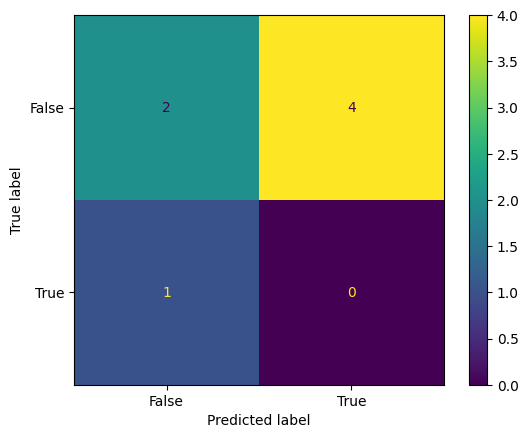

Precisión del modelo:
0.3333333333333333
Exactitud del modelo:
0.2857142857142857
Recall del modelo:
0.16666666666666666
Puntuación f1 del modelo:
0.2222222222222222

Para el clasificador: GaussianNB
Conjunto de datos: Dataset con valores brutos
Accuracy de cada fold: [0.6 0.6 0.8 0.4 0.8]
Accuracy promedio: 0.64


In [26]:
evaluate_classifier(classifier, X_test,y_test)
print()
cross_validation(classifier, X_train, y_train, 'GaussianNB', 'Dataset con valores brutos', cv=5)